## Assignment 8: Decision Trees on Amazon reviews data set [M]

Given Dataset consists of reviews of fine foods from amazon. Reviews describe (1)product and user information, (2)ratings, and (3) a plain text review.Here, decision Tree  algorithm is applied on amazon reviews datasets to predict whether a review is positive or negative.

Procedure to execute the above task is as follows:

* **Step1: Data Pre-processing is applied on given amazon reviews data-set.And Take sample of data from dataset because of computational limitations**


* **Step2: Time based splitting on train and test datasets.**


* **Step3: Apply  Feature generation techniques(avg w2v,tfidfw2v)** 
  
  
* **Step4: Apply Decision Tree algorithm using each technique.**


* **Step5: To find C(1/lambda) and gamma(=1/sigma).**

* **Step6: Decision tree Feature Importance using BOW and TF-IDF**

* **Step7: Images of Decision tree in png format with verious vectorizations.**


         

## Objective:

* To classify given reviews (positive (Rating of 4 or 5) & negative (rating of 1 or 2)) using Decision Trees  algorithm.







In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import re
import math

import pandas as pd
import numpy as np
import pickle
import graphviz 
# modules for text processing
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from tqdm import tqdm
import os
#import scikitplot.metrics as skplt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

from sklearn.decomposition import TruncatedSVD
import pytablewriter

# train-split data,accuracy-score,cross-validation modules

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection  import GridSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV


/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO

In [3]:
import zipfile
archive = zipfile.ZipFile('/floyd/input/pri/Reviews.zip', 'r')
csvfile = archive.open('Reviews.csv')

In [4]:
# Reading CSV file and printing first five rows 
amz = pd.read_csv(csvfile ) # reviews.csv is  dataset file
print(amz.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [5]:
# dimensions of dataset and columns name

print(amz.shape) 
#print(amz1.shape)
print(amz.columns)

(568454, 10)
Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')


The amazon reviews datafile contains 568454 rows of entry and 10 columns.For given objective, processing of data is necessary."Score" and "text" columns is processed for required result.

##### Given reviews with Score>3 a positive rating, and reviews with a score<3 a negative rating. If score is equal to 3,it is considered as neutral score.

In [6]:
# Processing
#Give reviews with Score>3 a positive rating, and reviews with a score<3 a negative rating.

def score_part(x):
    if x < 3:
        return 'negative'
    return 'positive'

actualScore = amz['Score']
#print(actualScore)
New_score = actualScore.map(score_part)
#print(New_score)
amz['Score']=New_score

# If score is equal to 3,it is considered as neutral score.

    






In [7]:
print(amz.shape)
amz.head(5)


(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...


#### Data Pre-processing on raw data:

Every datasets contains some unwanted data.Raw data is preprocessed by removing duplication.


In [8]:
#Processing of ProductId
#Sorting data according to ProductId in ascending order
sorted_data=amz.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
#sorted_data.head() # printing sorted data
# To check the duplications in raw data
dupli=sorted_data[sorted_data.duplicated(["UserId","ProfileName","Time","Text"])]
print(dupli.head(5))
# Remove Deduplication of entries
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final.shape
#Checking to see how much % of data still remains
(final['Id'].size*1.0)/(amz['Id'].size*1.0)*100
final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]
#Before starting the next phase of preprocessing lets see the number of entries left
print(final.shape)

#How many positive and negative reviews are present in our dataset?
final['Score'].value_counts()

            Id   ProductId          UserId  \
171222  171223  7310172001   AJD41FBJD9010   
171153  171154  7310172001   AJD41FBJD9010   
171151  171152  7310172001   AJD41FBJD9010   
217443  217444  7310172101  A22FICU3LCG2J1   
217444  217445  7310172101  A1LQV0PSM04DWI   

                                         ProfileName  HelpfulnessNumerator  \
171222  N. Ferguson "Two, Daisy, Hannah, and Kitten"                     1   
171153  N. Ferguson "Two, Daisy, Hannah, and Kitten"                     0   
171151  N. Ferguson "Two, Daisy, Hannah, and Kitten"                     0   
217443                                      C. Knapp                     1   
217444                                 B. Feuerstein                     1   

        HelpfulnessDenominator     Score        Time  \
171222                       1  positive  1233360000   
171153                       0  positive  1233360000   
171151                       0  positive  1233360000   
217443                       1

positive    336824
negative     57107
Name: Score, dtype: int64

List of total counts Postive score and Negative score ==> [336824, 57107]


Text(0.5,1,'Total counts of Postive score and Negative score ')

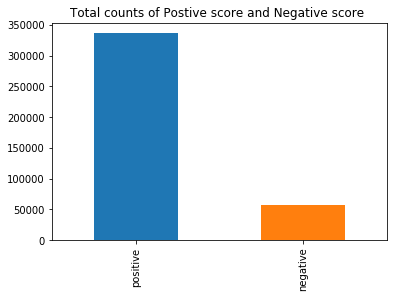

In [9]:
a=final['Score'].value_counts().tolist()
print('List of total counts Postive score and Negative score ==>',a)
final['Score'].value_counts().plot(kind='bar')
plt.title('Total counts of Postive score and Negative score ')


#### observations
* The positive reviews is greater than negative reviews.It makes data imbalanced.
* From the bar plot ,it is seen that sampled datasets of review is imbalnced.


# Text Preprocessing:

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
 
stop = set(stopwords.words('english')) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>$< /><')
    #cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned


cleaning html tags like" <.*?>" and punctuations like " r'[?|!|\'|"|#]',r''" from senetences

In [12]:
#final = final.sample(frac=0.004,random_state=1)
#print(final.shape)

In [13]:
#Code for implementing step-by-step the checks mentioned in the pre-processing phase.

'''Pre processing of text data:It is cleaning and flitering text'''
i=0
str1=' '
global final_string
final_string=[]
all_positive_words=[] 
all_negative_words=[] 
s=''
for sent in final['Text'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (final['Score'].values)[i] == 'positive': 
                        all_positive_words.append(s) #list of all words used to describe positive reviews
                    if(final['Score'].values)[i] == 'negative':
                        all_negative_words.append(s) #list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 
    #print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    #print("***********************************************************************")

    final_string.append(str1)
    i+=1
#print('all_positive_words =',len(all_positive_words))
#print('all_negative_words =',len(all_negative_words))

# Finding most frequently occuring Positive and Negative words 

freq_positive=nltk.FreqDist(all_positive_words)

freq_negative=nltk.FreqDist(all_negative_words)

#print("\nMost Common Positive Words : ",freq_positive.most_common(20))

#print("\nMost Common Negative Words : ",freq_negative.most_common(20))




##### Dumping and loading  Pre processing of text data in pickle file 

In [14]:
pickle_path_final_string='final_string.pkl'
final_string_file=open(pickle_path_final_string,'wb')
pickle.dump(final_string,final_string_file)
final_string_file.close()

In [12]:
pickle_path_final_string='final_string.pkl'
final_string_unpkl=open(pickle_path_final_string,'rb')
final_string=pickle.load(final_string_unpkl)

In [13]:

final['CleanedText']=final_string
#adding a column of CleanedText which displays the data after pre-processing of the review 
Pre_Process_Data = final[['CleanedText','Score','Time']] 

X_Text=Pre_Process_Data ['CleanedText']

Y_Score =Pre_Process_Data ['Score'] # positive or negative score
print('\nPre_Process_Text_Data  X_Text=',X_Text.shape)
print('\nPre_Process_Score_Data Y_Score=',Y_Score.shape)



Pre_Process_Text_Data  X_Text= (393931,)

Pre_Process_Score_Data Y_Score= (393931,)


In [14]:
# postive and negtive reviews from original datasets of amazon
pos_final = Pre_Process_Data[Pre_Process_Data .Score == 'positive']# postive reviews
pos_final = pos_final.sample(frac=0.3)
print(pos_final.Score.value_counts())

neg_final = Pre_Process_Data [Pre_Process_Data .Score == 'negative'] # negative reviews
print(neg_final.Score.value_counts())

positive    101047
Name: Score, dtype: int64
negative    57107
Name: Score, dtype: int64


In [15]:
final_pos_neg = pd.concat([pos_final,neg_final],axis=0)
print(len(final_pos_neg))
print(type(final_pos_neg))
#print('final_pos_neg=',final_pos_neg['Score'])

158154
<class 'pandas.core.frame.DataFrame'>


In [16]:
print(final_pos_neg.columns)

Index(['CleanedText', 'Score', 'Time'], dtype='object')


### Splitting Training and Testing dataset

In [17]:
# splitting training and testing dataset (Time based splitting)

X1 = final_pos_neg[['CleanedText','Time']].sort_values('Time',axis=0).drop('Time',axis=1)
#40k data sample
X=X1[:40000]

print(X.shape)
Y1 = final_pos_neg[['Score','Time']].sort_values('Time',axis=0).drop('Time',axis=1)
#40k data sample
Y=Y1[:40000]
print(Y.shape)
## 70 % of data

X_train_data ,X_test_data,Y_train,Y_test  = train_test_split(X,
                                                      Y.values,
                                                                       
                                                    test_size=0.3,shuffle=False)



print('X_train_data ',X_train_data.shape)

print('X_test_data ',X_test_data.shape )

print('Y_train_data ',Y_train .shape)

print('Y_test_data ',Y_test .shape)



(40000, 1)
(40000, 1)
X_train_data  (28000, 1)
X_test_data  (12000, 1)
Y_train_data  (28000, 1)
Y_test_data  (12000, 1)


In [18]:

Y_new = Y['Score'].map(lambda x: 1 if x == 'positive' else 0).values.ravel()
# Y train and Test for sparse datasets

y_train_new,y_test_new = train_test_split(Y_new,test_size=0.3,shuffle=False)
print('y_train_new ',y_train_new.shape)

print('y_test_new ',y_test_new .shape)


y_train_new  (28000,)
y_test_new  (12000,)


#  Optimal Depth of Tree for Decision Tree

In [19]:
 # Time seris splitting Cross-Validation
tscv = TimeSeriesSplit(n_splits=3)

In [20]:
# Optimal_Depth_Tree is function to calculate the optimal depth value Decision Tree
def Optimal_Depth_Tree(X_train,y_train):
    depthsize=list(range(3,25))
    cv_scores = []
    depth = []
 
    # perform 10-fold cross validation
    for k in range(len(depthsize)):
        #print(k)
        DT_clf = DecisionTreeClassifier(max_depth=depthsize[k],class_weight='balanced')
        scores = cross_val_score(DT_clf, 
                                 X_train, 
                                 y_train,
                                 cv=tscv, 
                                 n_jobs=-1)
        cv_scores.append(scores.mean())
        depth.append(depthsize[k])

    # changing to misclassification error
   
    MSE = [1 - x for x in cv_scores]

    # determining best depth
    global optimal_depth
    optimal_depth = depthsize[MSE.index(min(MSE))]
    print('\nThe optimal depth_size is %d.' % optimal_depth)


    
      # plot misclassification error vs depth sizeof tree
    fig4 = plt.figure( facecolor='g', edgecolor='k')
    fig4.suptitle('Tree Depth vs CV Scores',
                  fontsize=12)
    plt.plot(depthsize, MSE,'*-')


    for xy in zip(depthsize, np.round(MSE,3)):
        plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    
    plt.xlabel('Tree depthsize')
    plt.ylabel('CV Scores')
    plt.grid()
    plt.show()

    print("the misclassification error for each depth value is : ", np.round(MSE,5))

    return optimal_depth

##### Pandas dataframe to markdown Table format

In [21]:
# result_display  is function to convert dataframe into table format in Markdown
def result_display(df):
    writer = pytablewriter.MarkdownTableWriter()
    writer.header_list = list(df.columns.values)
    writer.value_matrix = df.values.tolist()
    writer.write_table()

## Decision Tree Image

In [22]:
import os
import io
import pydot

def decision_tree_image(classifier,features,name_png_format):
    
    os.environ["PATH"] += os.pathsep + 'C:/ProgramData/Anaconda3/pkgs/graphviz-2.38.0-4/Library/bin/graphviz'
    dotfile=io.StringIO()
    tree.export_graphviz(classifier, out_file=dotfile, 
                             feature_names=features,  

                             filled=True, rounded=True,  
                             special_characters=True)  
    #graph = graphviz.Source(dot_data)  
    (graph,)=pydot.graph_from_dot_data(dotfile.getvalue())
    graph.write_png(name_png_format)


*Decision_tree_image* is function to get image format of decision tree with verious Decision Tree classifier .

In [23]:
Train_data=y_train_new
Y_test_data=y_test_new 

# Methods to convert text into vector

Methods:
* Bag of Words

* Avg word2vec

* TF-IDF

* tf-idf weighted Word2Vec

Using above  Method is used to convert text to numeric vector as Bag of words & TF-IDF is high dimensional which results into bad decision tree.

# 1. Bag of Words (BoW)

##### BOW for Training Data

In [24]:
count_vect = CountVectorizer() #in scikit-learn
vect_Data = count_vect.fit_transform(X_train_data.values.ravel())
print(vect_Data .shape)

(28000, 20535)


In [25]:
# truncated SVD for dimesionality reduction for 100 dimensions
svd = TruncatedSVD(n_components=100)

final_data=svd.fit_transform(vect_Data )
print("TruncatedSVD :",final_data.shape)
    

TruncatedSVD : (28000, 100)


##### BOW for Testing Data

In [26]:
#vector of test data
vect_Data1= count_vect.transform(X_test_data.values.ravel())
print(vect_Data1.shape)



final_data_test=svd.transform(vect_Data1)
print("TruncatedSVD :",final_data_test.shape)

(12000, 20535)
TruncatedSVD : (12000, 100)


## Optimal Depth of tree using BOW


The optimal depth_size is 18.


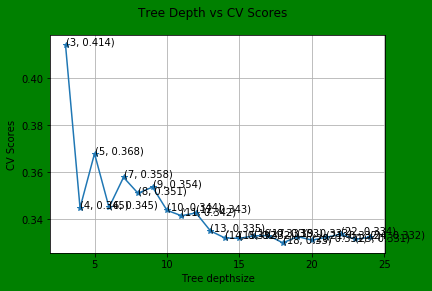

the misclassification error for each depth value is :  [0.41405 0.34486 0.36795 0.34505 0.35786 0.3511  0.35371 0.34381 0.34152
 0.34271 0.33505 0.33205 0.3319  0.33295 0.3331  0.32995 0.33267 0.33114
 0.33233 0.33367 0.33148 0.33238]


In [27]:
Optimal_Depth_Tree1=Optimal_Depth_Tree(final_data ,Train_data)

##### The optimal depth_size is 18 using BOW.

#### Decision Tree classifier for optimal depth

In [120]:
# Decision Tree classifier for optimal depth using gini index
DT_clf1 =DecisionTreeClassifier(criterion='gini',max_depth=optimal_depth,class_weight='balanced',random_state= 0)
DT_clf1.fit(final_data ,Train_data)
prediction1= DT_clf1.predict(final_data_test)

In [122]:
#Training accuracy and training error
training_score=DT_clf1.score(final_data ,Train_data)
print('training accuracy=',training_score)
training_error=1-training_score
print('training error is =',training_error)

training accuracy= 0.98075
training error is = 0.01924999999999999


In [123]:
# Testing Accuracy and testing error for decision Tree model
Testing_score=round(accuracy_score(Y_test_data ,prediction1),5)
print("Accuracy for decision Tree  model with Avg word2vec is = ",Testing_score)
Testing_error=1-Testing_score
print("Testing error for decision Tree  model with Avg word2vec is = ",Testing_error)

Accuracy for decision Tree  model with Avg word2vec is =  0.66742
Testing error for decision Tree  model with Avg word2vec is =  0.33258


In [124]:
F1_score = round(f1_score(Y_test_data ,prediction1,average='macro'),5)*100
recall = round(recall_score(Y_test_data,prediction1,average='macro'),5)*100
precision = round(precision_score(Y_test_data ,prediction1,average='macro'),5)*100

In [125]:
print(classification_report( Y_test_data,prediction1))

             precision    recall  f1-score   support

          0       0.49      0.47      0.48      3929
          1       0.75      0.76      0.76      8071

avg / total       0.66      0.67      0.67     12000



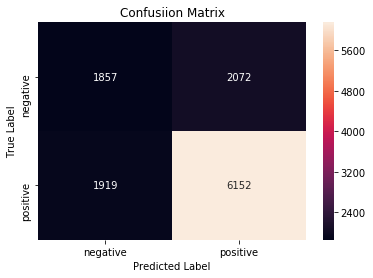

In [126]:
cm = confusion_matrix(Y_test_data ,prediction1)
label = ['negative', 'positive']
df_conf = pd.DataFrame(cm, index = label, columns = label)
sns.heatmap(df_conf, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [127]:
models_performence1 = {
    'Model':['Decision Tree'],   
    'Vectorizer': ['BOW'],    
    'Optimal Depthsize':[optimal_depth],
    'Training error':[training_error],
    'Test error':[Testing_error],
    'Accuracy':[Testing_score*100],
    'F1':[F1_score],
    'recall':[recall],
    'precision':[precision]
    
  
}


In [128]:
columns = ["Model","Vectorizer", "Optimal Depthsize", "Training error",  "Test error",
            "Accuracy","F1","recall","precision",
          ]
df=pd.DataFrame(models_performence1, columns=columns)
result_display(df)

|    Model    |Vectorizer|Optimal Depthsize|Training error|Test error|Accuracy| F1  |recall|precision|
|-------------|----------|----------------:|-------------:|---------:|-------:|----:|-----:|--------:|
|Decision Tree|BOW       |               18|       0.01925|    0.3326|   66.74|61.86| 61.74|    61.99|



|    Model    |Vectorizer|Optimal Depthsize|Training error|Test error|Accuracy| F1  |recall|precision|
|-------------|----------|----------------:|-------------:|---------:|-------:|----:|-----:|--------:|
|Decision Tree|BOW       |               18|       0.01925|    0.3326|   66.74|61.86| 61.74|    61.99|


### Observation:
* BOW is high dimensional vectorizer technique.
* Dimesional Reductionality is done using Trucated SVd .

* From confusion matrix ,TPR is too high.
* TNR,FPR,FNR is very low and almost similar.
* Precision value is only 61.99%..
* Since depth od tree is high ,model undergoes for overfitting.


# 2. Avg word2vec
Firstly, word2vec model is designed for amazon reviews using gensim module.

In [37]:
import gensim
list_sent=[]
for text in tqdm(X_train_data.values.ravel()): 
    filter_text=[]
    for i in text.split():
        if(i.isalpha()):
            filter_text.append(i.lower().decode("utf-8"))
        else:
            continue 
    list_sent.append(filter_text)
print(len(list_sent))


    

100%|██████████| 28000/28000 [00:00<00:00, 35378.97it/s]


28000


##### word2vec Model using Training Datasets

In [38]:

w2v_model=gensim.models.Word2Vec(list_sent,min_count=5,size=100, workers=4) 
#this model is used in avg word2vec  .  


In [39]:
words = list(w2v_model.wv.vocab)
print(len(words))

7183


In [40]:
pickle_path_w2v_model='w2v_model.pkl'
w2v_model_path=open(pickle_path_w2v_model,'wb')
pickle.dump(w2v_model,w2v_model_path)
w2v_model_path.close()

In [41]:
pickle_path_w2v_model='w2v_model.pkl'
unpickle_w2v_model=open(pickle_path_w2v_model,'rb')
w2v_model=pickle.load(unpickle_w2v_model)

#### Avg Word2Vec 

In [42]:
#  For Training

sent_vectors = []
for sent in  tqdm(list_sent): # for each review/sentence
    sent_vec = np.zeros(100) 
    cnt_words =0 # num of words with a valid vector in the sentence/review
    for word in sent: 
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)


print(len(sent_vectors))

#print(sent_vectors[0:4])




100%|██████████| 28000/28000 [00:05<00:00, 5570.97it/s]

28000


In [43]:
# Converting Nan value to zero in sent vectors.
Sent_Nan = np.where(np.isnan(sent_vectors), 0, sent_vectors)



In [44]:
# converting sent list to nd array
Sent_final_vector = np.asarray(Sent_Nan )
print(type(Sent_final_vector))


<class 'numpy.ndarray'>


In [45]:
#  ForTesting
# Words in test reviews
list_sent_test=[]
for text in tqdm(X_test_data.values.ravel()): 
    filter_text=[]
    for i in text.split():
        if(i.isalpha()):
            filter_text.append(i.lower().decode("utf-8"))
        else:
            continue 
    list_sent_test.append(filter_text)
#print(len(list_sent_test))

sent_vectors1 = []
for sent in tqdm(list_sent_test): # for each review/sentence
    sent_vec = np.zeros(100) 
    cnt_words =0 # num of words with a valid vector in the sentence/review
    for word in sent: 
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors1.append(sent_vec)


print(len(sent_vectors1))

#print(sent_vectors1)
# Converting Nan value to zero in sent vectors.
Sent_Nan1 = np.where(np.isnan(sent_vectors1), 0, sent_vectors1)

# converting sent list to nd array
Sent_final_vector1 = np.asarray(Sent_Nan1)
print(type(Sent_final_vector1))



100%|██████████| 12000/12000 [00:02<00:00, 5262.07it/s]

12000
<class 'numpy.ndarray'>


#### Dumping & Loading Pickle file for  Avg word2vec

In [46]:
pickle_path_AW2V_train='X_data_AW2V_train.pkl'
X_data_AW2V_train=open(pickle_path_AW2V_train,'wb')
pickle.dump(Sent_final_vector,X_data_AW2V_train)
X_data_AW2V_train.close()

pickle_path_AW2V_test='X_data_AW2V_test.pkl'
X_data_AW2V_test=open(pickle_path_AW2V_test,'wb')
pickle.dump(Sent_final_vector1,X_data_AW2V_test)
X_data_AW2V_test.close()


In [47]:
pickle_path_AW2V_train='X_data_AW2V_train.pkl'
unpickle_path3_train=open(pickle_path_AW2V_train,'rb')
Sent_final_vector=pickle.load(unpickle_path3_train)

pickle_path_AW2V_test='X_data_AW2V_test.pkl'
unpickle_path3_test=open(pickle_path_AW2V_test,'rb')
Sent_final_vector1=pickle.load(unpickle_path3_test)

In [48]:
# For Train
final_w2v_count_Train=Sent_final_vector
print(final_w2v_count_Train.shape)

(28000, 100)


In [49]:

final_w2v_count_Test=Sent_final_vector1# For Test
print(final_w2v_count_Test.shape)


(12000, 100)


##### for Training datasets ,avg word2vec 
                 final_w2v_count_Train,                 
              
   
##### for testing datasets ,avg word2vec 
                 final_w2v_count_Test, 
                

## Optimal Depth of tree using Avg word2vec


The optimal depth_size is 10.


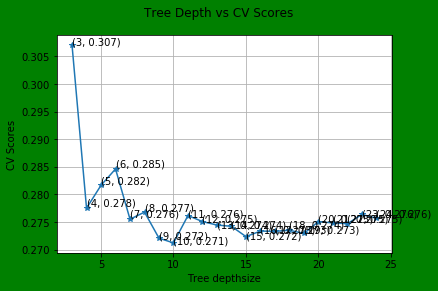

the misclassification error for each depth value is :  [0.307   0.27752 0.28167 0.28462 0.27552 0.27681 0.2721  0.27124 0.27619
 0.2751  0.27448 0.27424 0.27238 0.27338 0.27333 0.27352 0.27295 0.2751
 0.27486 0.27471 0.27638 0.27571]


In [50]:
Optimal_Depth_Tree1=Optimal_Depth_Tree(final_w2v_count_Train ,Train_data)

### Observation
* The optimal depth_size  is 12 using Avg word2vec featurization on Decision Tree model.
* The misclassification error for each depth value is 0.26348 and It is shown in above graph.


#### Decision Tree classifier for optimal depth

In [136]:
# Decision Tree classifier for optimal depth using gini index
DT_clf2 =DecisionTreeClassifier(criterion='gini',
                                max_depth=optimal_depth,
                                class_weight='balanced',
                                random_state= 0)
DT_clf2.fit(final_w2v_count_Train ,Train_data)
prediction2= DT_clf2.predict(final_w2v_count_Test)


In [137]:
#Training accuracy and training error
training_score=DT_clf2.score(final_w2v_count_Train ,Train_data)
print('training accuracy=',training_score)
training_error=1-training_score
print('training error is =',training_error)

training accuracy= 0.8420357142857143
training error is = 0.15796428571428567


In [138]:
# Testing Accuracy and testing error for decision Tree model
Testing_score=round(accuracy_score(Y_test_data ,prediction2),5)
print("Accuracy for decision Tree  model with Avg word2vec is = ",Testing_score)
Testing_error=1-Testing_score
print("Testing error for decision Tree  model with Avg word2vec is = ",Testing_error)

Accuracy for decision Tree  model with Avg word2vec is =  0.72717
Testing error for decision Tree  model with Avg word2vec is =  0.27283


In [139]:
F1_score = round(f1_score(Y_test_data ,prediction2,average='macro'),5)*100
recall = round(recall_score(Y_test_data,prediction2,average='macro'),5)*100
precision = round(precision_score(Y_test_data ,prediction2,average='macro'),5)*100

In [140]:
print(classification_report( Y_test_data,prediction2))

             precision    recall  f1-score   support

          0       0.56      0.73      0.64      3929
          1       0.85      0.73      0.78      8071

avg / total       0.75      0.73      0.73     12000



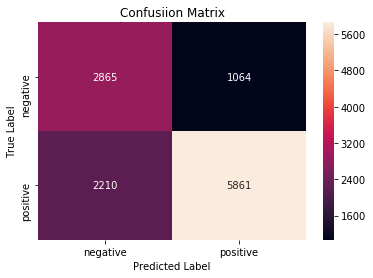

In [141]:
cm = confusion_matrix(Y_test_data ,prediction2)
label = ['negative', 'positive']
df_conf = pd.DataFrame(cm, index = label, columns = label)
sns.heatmap(df_conf, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [142]:
models_performence1['Model'].append('Decision Tree')
models_performence1['Vectorizer'].append('Avg word2vec')
models_performence1['Optimal Depthsize'].append(optimal_depth)
models_performence1['Training error'].append(training_error)
models_performence1[ 'Test error'].append(Testing_error)
models_performence1[ 'Accuracy'].append(Testing_score*100)
models_performence1[ 'F1'].append(F1_score)
models_performence1['recall'].append(recall)
models_performence1[ 'precision'].append(precision)

In [143]:
columns = ["Model","Vectorizer", "Optimal Depthsize", "Training error",  "Test error",
            "Accuracy","F1","recall","precision",
          ]
df2=pd.DataFrame(models_performence1, columns=columns)
result_display(df2)

|    Model    | Vectorizer |Optimal Depthsize|Training error|Test error|Accuracy| F1  |recall|precision|
|-------------|------------|----------------:|-------------:|---------:|-------:|----:|-----:|--------:|
|Decision Tree|BOW         |               18|       0.01925|    0.3326|   66.74|61.86| 61.74|    61.99|
|Decision Tree|Avg word2vec|               10|       0.15796|    0.2728|   72.72|70.90| 72.77|    70.54|



|    Model    | Vectorizer |Optimal Depthsize|Training error|Test error|Accuracy| F1  |recall|precision|
|-------------|------------|----------------:|-------------:|---------:|-------:|----:|-----:|--------:|
|Decision Tree|BOW         |               18|       0.01925|    0.3326|   66.74|61.86| 61.74|    61.99|
|Decision Tree|Avg word2vec|               10|       0.15796|    0.2728|   72.72|70.90| 72.77|    70.54|


### Observation:

* Decision Tree for avg word2vec featurization  work properly  on Amazon reviews data set .
* All scoring metrics's results is best. F1 score is 70.90%
* Optimal depthsize is 10.
* From confusion matrix,TPR &TNR is high. It means model is working properly as comapred BOW.


# 3. TF-IDF


##### TF-IDF for Training data

In [60]:

tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
final_tf_idf11 = tf_idf_vect.fit_transform(X_train_data.values.ravel())
final_tf_idf11.get_shape()
tfidf_feat = tf_idf_vect.get_feature_names() 

In [61]:
final_tf_idf=svd.fit_transform(final_tf_idf11 )
print("TruncatedSVD :",final_tf_idf.shape)


TruncatedSVD : (28000, 100)


#### Dumping & Loading Pickle file for training data (TF-IDF)

In [62]:
pickle_path_tfidf_train='X_train_data_tfidf.pkl'
X_train_data_tfidf=open(pickle_path_tfidf_train,'wb')
pickle.dump(final_tf_idf ,X_train_data_tfidf)
X_train_data_tfidf.close()

In [63]:
pickle_path_tfidf_train='X_train_data_tfidf.pkl'
unpickle_path5=open(pickle_path_tfidf_train,'rb')
final_tf_idf=pickle.load(unpickle_path5)

In [64]:

final_tfidf_np= final_tf_idf
print("Train Data: ",final_tfidf_np.shape)

warnings.filterwarnings("ignore")    

Train Data:  (28000, 100)


In [65]:
final_tf_idf_test1_svd = tf_idf_vect.transform(X_test_data.values.ravel())
final_tf_idf_test1_svd.get_shape()

(12000, 493062)

In [66]:


final_tf_idf_test=svd.transform(final_tf_idf_test1_svd)
print("TruncatedSVD :",final_tf_idf_test.shape)
#Normalize Data
#X_sparse_tsvd = svd.fit(vect_Data1).transform(X_sparse)

TruncatedSVD : (12000, 100)


#### Dumping & Loading Pickle file for testing data(TF-IDF)

In [67]:

pickle_path_tfidf_test='X_test_data_tfidf.pkl'
X_test_data_tfidf=open(pickle_path_tfidf_test,'wb')
pickle.dump(final_tf_idf_test ,X_test_data_tfidf)
X_test_data_tfidf.close()

In [68]:
pickle_path_tfidf_test='X_test_data_tfidf.pkl'
unpickle_path6=open(pickle_path_tfidf_test,'rb')
final_tfidf_np_test=pickle.load(unpickle_path6)


The optimal depth_size is 14.


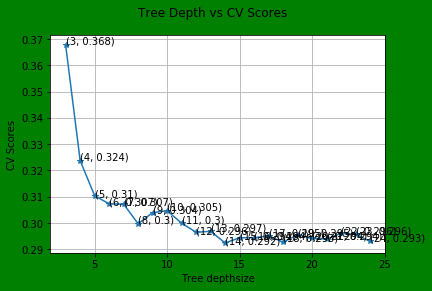

the misclassification error for each depth value is :  [0.36762 0.32371 0.31033 0.30724 0.30714 0.29967 0.3039  0.30462 0.2999
 0.29643 0.29681 0.29238 0.29433 0.29438 0.29505 0.29267 0.29548 0.2941
 0.29386 0.29605 0.29562 0.29305]


In [69]:
Optimal_Depth_Tree1=Optimal_Depth_Tree(final_tfidf_np,Train_data)

#### Decision Tree classifier for optimal depth

In [145]:
DT_clf3 =DecisionTreeClassifier(criterion='gini',
                                max_depth=optimal_depth,class_weight='balanced', random_state= 0)
DT_clf3.fit(final_tfidf_np,Train_data)
prediction3= DT_clf3.predict(final_tfidf_np_test)

In [146]:
#Training accuracy and training error
training_score=DT_clf3.score(final_tfidf_np,Train_data)
print('training accuracy=',training_score)
training_error=1-training_score
print('training error is =',training_error)

training accuracy= 0.9204285714285714
training error is = 0.07957142857142863


In [147]:
# Testing Accuracy and testing error for knn model

Testing_score=round(accuracy_score(Y_test_data ,prediction3),5)
print("Accuracy for Decision tree model with TF-IDF weighted Word2Vec is = ",Testing_score)
Testing_error=1-Testing_score
print("Testing error for decision Tree model withTF-IDF weighted Word2Vec is = ",Testing_error)

Accuracy for Decision tree model with TF-IDF weighted Word2Vec is =  0.69467
Testing error for decision Tree model withTF-IDF weighted Word2Vec is =  0.30533


In [148]:
F1_score = round(f1_score(Y_test_data ,prediction3,average='macro'),5)*100
recall = round(recall_score(Y_test_data,prediction3,average='macro'),5)*100
precision = round(precision_score(Y_test_data ,prediction3,average='macro'),5)*100

In [149]:
print(classification_report( Y_test_data,prediction3))

             precision    recall  f1-score   support

          0       0.53      0.58      0.56      3929
          1       0.79      0.75      0.77      8071

avg / total       0.70      0.69      0.70     12000



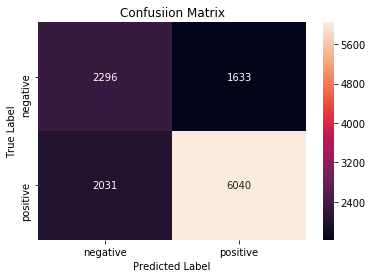

In [150]:
cm = confusion_matrix(Y_test_data ,prediction3)
label = ['negative', 'positive']
df_conf = pd.DataFrame(cm, index = label, columns = label)
sns.heatmap(df_conf, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [151]:
models_performence1['Model'].append('Decision Tree')
models_performence1['Vectorizer'].append('TF-IDF')
models_performence1['Optimal Depthsize'].append(optimal_depth)
models_performence1['Training error'].append(training_error)
models_performence1[ 'Test error'].append(Testing_error)
models_performence1[ 'Accuracy'].append(Testing_score*100)
models_performence1[ 'F1'].append(F1_score)
models_performence1['recall'].append(recall)
models_performence1[ 'precision'].append(precision)

In [152]:
columns = ["Model","Vectorizer", "Optimal Depthsize", "Training error",  "Test error",
            "Accuracy","F1","recall","precision",
          ]
df3=pd.DataFrame(models_performence1, columns=columns)
result_display(df3)

|    Model    | Vectorizer |Optimal Depthsize|Training error|Test error|Accuracy| F1  |recall|precision|
|-------------|------------|----------------:|-------------:|---------:|-------:|----:|-----:|--------:|
|Decision Tree|BOW         |               18|       0.01925|    0.3326|   66.74|61.86| 61.74|    61.99|
|Decision Tree|Avg word2vec|               10|       0.15796|    0.2728|   72.72|70.90| 72.77|    70.54|
|Decision Tree|TF-IDF      |               14|       0.07957|    0.3053|   69.47|66.17| 66.64|    65.89|



|    Model    | Vectorizer |Optimal Depthsize|Training error|Test error|Accuracy| F1  |recall|precision|
|-------------|------------|----------------:|-------------:|---------:|-------:|----:|-----:|--------:|
|Decision Tree|BOW         |               18|       0.01925|    0.3326|   66.74|61.86| 61.74|    61.99|
|Decision Tree|Avg word2vec|               10|       0.15796|    0.2728|   72.72|70.90| 72.77|    70.54|
|Decision Tree|TF-IDF      |               14|       0.07957|    0.3053|   69.47|66.17| 66.64|    65.89|

### Observations:
* The optimal depth size of decision tree using TF-IDF is 14.
* from confusion matrix, FPR,FNR & TNR is too low and almost similar. It means model doesn't work properly.TPR is too high.


#  4.TF-IDF weighted Word2Vec

In [79]:
tfidf_feat = tf_idf_vect.get_feature_names() 
w2v_words = list(w2v_model.wv.vocab)
dictionary = dict(zip(tf_idf_vect.get_feature_names(), list(tf_idf_vect.idf_)))

In [80]:
list_of_sent=[]
for sent in tqdm(X_train_data.values.ravel()):
    list_of_sent.append(sent.decode("utf-8").split())

100%|██████████| 28000/28000 [00:00<00:00, 154692.47it/s]


In [81]:
# TF-IDF weighted Word2Vec
tfidf_feat =tf_idf_vect.get_feature_names() # tfidf words/col-names

tfidf_sent_vectors = []; 
row=0;
for sent in tqdm(list_of_sent): 
    sent_vec = np.zeros(100) 
    weight_sum =0;
    for word in sent: 
        if word in w2v_words:
            vec = w2v_model.wv[word]
#             
            tf_idf = dictionary[word]*sent.count(word)
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors .append(sent_vec)
    row += 1

100%|██████████| 28000/28000 [00:55<00:00, 504.22it/s]


In [82]:
print(len(tfidf_sent_vectors))

28000


In [83]:
#print(tfidf_sent_vectors[2])
tfidf_sent_vectors_train  = np.where(np.isnan(tfidf_sent_vectors ), 0, tfidf_sent_vectors )
#print(tfidf_sent_vectors_train[2])

In [84]:
tfidf_sent_vectors_train  = np.asarray(tfidf_sent_vectors_train )
print(type(tfidf_sent_vectors))

<class 'list'>


#### Dumping & Loading Pickle file for trainText data (TF-IDF weighted word2vec)

In [85]:
pickle_path_tfidf_weighted='X_data_tfidf_weighted.pkl'
X_data_tfidf_weighted=open(pickle_path_tfidf_weighted,'wb')
pickle.dump(tfidf_sent_vectors_train  ,X_data_tfidf_weighted)
X_data_tfidf_weighted.close()

In [86]:
pickle_path_tfidf_weighted='X_data_tfidf_weighted.pkl'
unpickle_path7=open(pickle_path_tfidf_weighted,'rb')
tfidf_sent_vectors_train =pickle.load(unpickle_path7)

In [87]:
final_tfidf_w2v_np_train=tfidf_sent_vectors_train

##### For test Tf-idf weighted word2vec

In [88]:
list_of_sent1=[]
for sent in tqdm(X_test_data.values.ravel()):
    list_of_sent1.append(sent.decode("utf-8").split())

100%|██████████| 12000/12000 [00:00<00:00, 113486.60it/s]


In [89]:
# TF-IDF weighted Word2Vec
tfidf_feat =tf_idf_vect.get_feature_names() # tfidf words/col-names

tfidf_sent_vectors1 = []; 
row=0;
for sent in tqdm( list_of_sent1): 
    sent_vec = np.zeros(100) 
    weight_sum =0;
    for word in sent: 
        if word in w2v_words:
            vec = w2v_model.wv[word]
#             
            tf_idf = dictionary[word]*sent.count(word)
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors1 .append(sent_vec)
    row += 1

100%|██████████| 12000/12000 [00:24<00:00, 482.02it/s]


In [118]:
#print(len(tfidf_sent_vectors1))
#print(tfidf_sent_vectors1[2])
tfidf_sent_vectors_test  = np.where(np.isnan(tfidf_sent_vectors1 ),
                                     0, tfidf_sent_vectors1 )
#print(tfidf_sent_vectors_test[2])
final_tfidf_w2v_np_test = np.asarray(tfidf_sent_vectors_test )
#print(type(tfidf_sent_vectors1))

#### Dumping & Loading Pickle file for test Text data (TF-IDF weighted word2vec)

In [91]:
pickle_path_tfidf_weighted1='X_data_tfidf_weighted_test.pkl'
X_data_tfidf_weighted1=open(pickle_path_tfidf_weighted1,'wb')
pickle.dump(final_tfidf_w2v_np_test  ,X_data_tfidf_weighted1)
X_data_tfidf_weighted1.close()

In [92]:
pickle_path_tfidf_weighted1='X_data_tfidf_weighted_test.pkl'
unpickle_path71=open(pickle_path_tfidf_weighted1,'rb')
final_tfidf_w2v_np_test1 =pickle.load(unpickle_path71)

In [93]:
final_tfidf_w2v_np_test= final_tfidf_w2v_np_test1

for Training Data:

            
            final_tfidf_w2v_np_train

For testing data:

            
            final_tfidf_w2v_np_test
    

## Optimal Depth of tree using TF-IDF weighted Word2Vec


The optimal depth_size is 16.


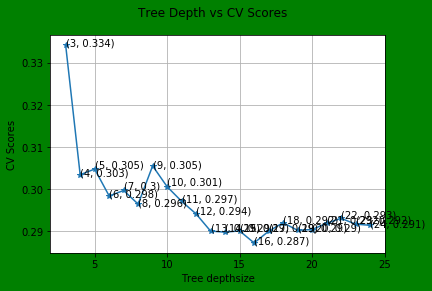

the misclassification error for each depth value is :  [0.33419 0.30338 0.30471 0.29833 0.29962 0.29638 0.30548 0.30052 0.29705
 0.29405 0.28995 0.28971 0.29    0.28714 0.2899  0.29195 0.29014 0.29033
 0.29181 0.293   0.29162 0.29133]


In [94]:
Optimal_Depth_Tree1=Optimal_Depth_Tree(final_tfidf_w2v_np_train,Train_data)


#### Decision Tree classifier for optimal depth

In [154]:
DT_clf4 =DecisionTreeClassifier(criterion='gini',max_depth=optimal_depth,class_weight='balanced', random_state= 0)
DT_clf4.fit(final_tfidf_w2v_np_train,Train_data)
prediction4= DT_clf4.predict(final_tfidf_w2v_np_test)

In [155]:
#Training accuracy and training error
training_score=DT_clf4.score(final_tfidf_w2v_np_train,Train_data)
print('training accuracy=',training_score)
training_error=1-training_score
print('training error is =',training_error)

training accuracy= 0.9603928571428572
training error is = 0.03960714285714284


In [156]:
# Testing Accuracy and testing error for knn model

Testing_score=round(accuracy_score(Y_test_data ,prediction4),5)
print("Accuracy for Decision tree model with TF-IDF weighted Word2Vec is = ",Testing_score)
Testing_error=1-Testing_score
print("Testing error for decision Tree model withTF-IDF weighted Word2Vec is = ",Testing_error)

Accuracy for Decision tree model with TF-IDF weighted Word2Vec is =  0.7025
Testing error for decision Tree model withTF-IDF weighted Word2Vec is =  0.2975


In [157]:
F1_score = round(f1_score(Y_test_data ,prediction4,average='macro'),5)*100
recall = round(recall_score(Y_test_data,prediction4,average='macro'),5)*100
precision = round(precision_score(Y_test_data ,prediction4,average='macro'),5)*100

In [158]:
print(classification_report( Y_test_data,prediction4))

             precision    recall  f1-score   support

          0       0.54      0.58      0.56      3929
          1       0.79      0.76      0.78      8071

avg / total       0.71      0.70      0.70     12000



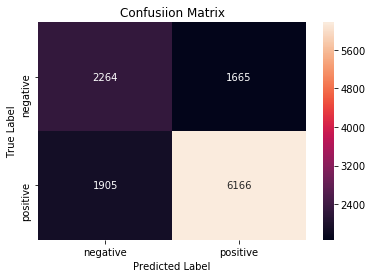

In [159]:
cm = confusion_matrix(Y_test_data ,prediction4)
label = ['negative', 'positive']
df_conf = pd.DataFrame(cm, index = label, columns = label)
sns.heatmap(df_conf, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [160]:
models_performence1['Model'].append('Decision Tree')
models_performence1['Vectorizer'].append('TF-IDF weighted word2vec')
models_performence1['Optimal Depthsize'].append(optimal_depth)
models_performence1['Training error'].append(training_error)
models_performence1[ 'Test error'].append(Testing_error)
models_performence1[ 'Accuracy'].append(Testing_score*100)
models_performence1[ 'F1'].append(F1_score)
models_performence1['recall'].append(recall)
models_performence1[ 'precision'].append(precision)

In [161]:
columns = ["Model","Vectorizer", "Optimal Depthsize", "Training error",  "Test error",
            "Accuracy","F1","recall","precision",
          ]
df4=pd.DataFrame(models_performence1, columns=columns)
result_display(df4)

|    Model    |       Vectorizer       |Optimal Depthsize|Training error|Test error|Accuracy| F1  |recall|precision|
|-------------|------------------------|----------------:|-------------:|---------:|-------:|----:|-----:|--------:|
|Decision Tree|BOW                     |               18|       0.01925|    0.3326|   66.74|61.86| 61.74|    61.99|
|Decision Tree|Avg word2vec            |               10|       0.15796|    0.2728|   72.72|70.90| 72.77|    70.54|
|Decision Tree|TF-IDF                  |               14|       0.07957|    0.3053|   69.47|66.17| 66.64|    65.89|
|Decision Tree|TF-IDF weighted word2vec|               16|       0.03961|    0.2975|   70.25|66.73| 67.01|    66.52|



|    Model    |       Vectorizer       |Optimal Depthsize|Training error|Test error|Accuracy| F1  |recall|precision|
|-------------|------------------------|----------------:|-------------:|---------:|-------:|----:|-----:|--------:|
|Decision Tree|BOW                     |               18|       0.01925|    0.3326|   66.74|61.86| 61.74|    61.99|
|Decision Tree|Avg word2vec            |               10|       0.15796|    0.2728|   72.72|70.90| 72.77|    70.54|
|Decision Tree|TF-IDF                  |               14|       0.07957|    0.3053|   69.47|66.17| 66.64|    65.89|
|Decision Tree|TF-IDF weighted word2vec|               16|       0.03961|    0.2975|   70.25|66.73| 67.01|    66.52|


### Observations:
* Though the dimesions od tf-idf weighted word2vec is low as comapred to BOW & TF_idf,results for  decision tree is poor as seen in table.
* the optimal depth size is 16.

## Feature Importance for Decision Tree

In [106]:
def top_feats(row, features, top_n=15):
    topn_ids = np.argsort(row)[::-1][:top_n]
    names = np.array(features)
    print(names[topn_ids])
    top_feats = [(features[i], row[i]) for i in topn_ids]
    global df_feat
    df_feat = pd.DataFrame(top_feats,names[topn_ids])
    df_feat.columns = ['FEATURE', 'Feat_IMP_value']
    
    return df_feat

#### Feature importance using count_vect

In [132]:
# Decision Tree classifier for optimal depth using gini index
DT_clf11 =DecisionTreeClassifier(criterion='gini',max_depth=18,class_weight='balanced',random_state= 0)
data=count_vect.fit_transform(X_train_data.values.ravel())
DT_clf11.fit(data ,Train_data)
# Calculate feature importances
count_vect_feature=count_vect.get_feature_names()
feature_importance = DT_clf11.feature_importances_


In [133]:
top_feat = top_feats(feature_importance,count_vect_feature,15)
result_display(top_feat)

['great' 'best' 'disappoint' 'love' 'delici' 'excel' 'good' 'favorit'
 'bad' 'perfect' 'money' 'tast' 'nice' 'tasti' 'would']
| FEATURE  |Feat_IMP_value|
|----------|-------------:|
|great     |       0.10429|
|best      |       0.06659|
|disappoint|       0.05747|
|love      |       0.05009|
|delici    |       0.03636|
|excel     |       0.02647|
|good      |       0.02389|
|favorit   |       0.02266|
|bad       |       0.02165|
|perfect   |       0.01909|
|money     |       0.01729|
|tast      |       0.01323|
|nice      |       0.01306|
|tasti     |       0.01214|
|would     |       0.01170|



Text(0,0.5,'Relative Feature Importance  ')

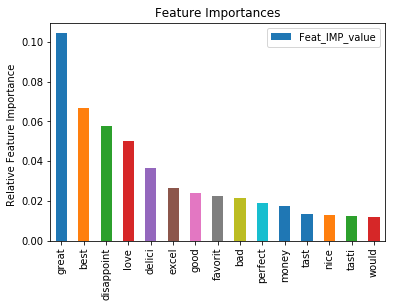

In [134]:
df_feat.plot.bar(y='Feat_IMP_value',title='Feature Importances', rot=90)
plt.ylabel('Relative Feature Importance  ')

#### Feature importance using tf-idf -vect

In [162]:
model =DecisionTreeClassifier(criterion='gini',max_depth=14,class_weight='balanced',random_state= 0)
final_tf_idf11 = tf_idf_vect.fit_transform(X_train_data.values.ravel())
model.fit(final_tf_idf11 ,Train_data)
tf_idf_feature=tf_idf_vect .get_feature_names()
feature_importance1 = model.feature_importances_


In [163]:
# Relative Feature Importance  using tf_idf
top_feat1 = top_feats(feature_importance1,tf_idf_feature,15)
result_display(top_feat1)



['great' 'best' 'love' 'disappoint' 'delici' 'excel' 'perfect' 'good'
 'favorit' 'high recommend' 'nice' 'money' 'tasti' 'easi' 'tast']
|   FEATURE    |Feat_IMP_value|
|--------------|-------------:|
|great         |       0.13924|
|best          |       0.08770|
|love          |       0.06648|
|disappoint    |       0.06602|
|delici        |       0.05085|
|excel         |       0.03439|
|perfect       |       0.03339|
|good          |       0.03134|
|favorit       |       0.02762|
|high recommend|       0.01984|
|nice          |       0.01898|
|money         |       0.01806|
|tasti         |       0.01545|
|easi          |       0.01347|
|tast          |       0.01299|



Text(0,0.5,'Relative Feature Importance  ')

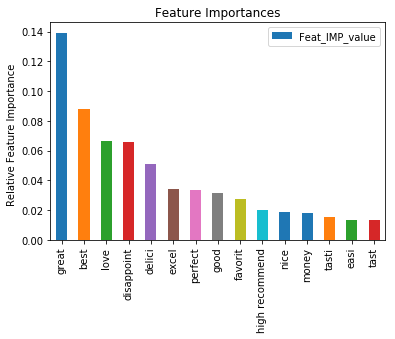

In [165]:
df_feat.plot.bar(y='Feat_IMP_value',title='Feature Importances', rot=90)
plt.ylabel('Relative Feature Importance  ')


|FEATURE_BOW|   Feat_IMP_value_BOW| FEATURE_TFIDF|   Feat_IMP_value_TFIDF|
|----------|-------------:|----------|-------------:|
|great     |       0.10429|great     |       0.13924|
|best      |       0.06659|best      |       0.08770|
|disappoint|       0.05747|love      |       0.06648|
|love      |       0.05009|disappoint|       0.06602|
|delici    |       0.03636|delici    |       0.05085|
|excel     |       0.02647|excel     |       0.03439|
|good      |       0.02389|perfect   |       0.03339|
|favorit   |       0.02266|good      |       0.03134|
|bad       |       0.02165|favorit   |       0.02762|
|perfect   |       0.01909|highrecomm|       0.01984|
|money     |       0.01729|nice      |       0.01898|
|tast      |       0.01323|money     |       0.01806|
|nice      |       0.01306|tasti     |       0.01545|
|tasti     |       0.01214|easi      |       0.01347|
|would     |       0.01170|tast      |       0.01299|

# Decision Tree Image with all vectorization method

####  Decision Tree Classifier
 * DT_clf1 using BOW
 * DT_clf2 using Avg word2vec
 * DT_clf3 Using TF-IDF
 * DT_clf4 using TF-IDF weighted word2vec

In [166]:
Classifier=[DT_clf1,DT_clf2,DT_clf3,DT_clf4]

#### Features_name

* features using BOW for Decision tree image using BOW & Avg word2vec:

    1. feature_importance
    
* Features using Tf-IDF for Decision tree image using TF-Idf & TF-IDF weighted word2vec: 
   
       2.tf_idf_feature 

In [167]:
features=tf_idf_feature[:100]

#### name_png_format:
    1. BOW_Decision_Tree.png
    2. Avg word2vec.png
    3. TF-IDF.png
    4. TF-IDF weighted word2vec.png

In [168]:
name_png_format=['BOW_Decision_Tree.png','Avg word2vec.png','TF-IDF.png','TF-IDF weighted word2vec.png']

In [169]:

for i in tqdm(range(4)):
    
    decision_tree_image(Classifier[i],features,name_png_format[i])

100%|██████████| 4/4 [03:17<00:00, 49.39s/it]


## Observation:


|    Model    |       Vectorizer       |Optimal Depthsize|Training error|Test error|Accuracy| F1  |recall|precision|
|-------------|------------------------|----------------:|-------------:|---------:|-------:|----:|-----:|--------:|
|Decision Tree|BOW                     |               18|       0.01925|    0.3326|   66.74|61.86| 61.74|    61.99|
|Decision Tree|Avg word2vec            |               10|       0.15796|    0.2728|   72.72|70.90| 72.77|    70.54|
|Decision Tree|TF-IDF                  |               14|       0.07957|    0.3053|   69.47|66.17| 66.64|    65.89|
|Decision Tree|TF-IDF weighted word2vec|               16|       0.03961|    0.2975|   70.25|66.73| 67.01|    66.52|

* The results obtained after training and testing the amazon reviews datasets for Avg word2vecis best compared to other techniques.

* The Depth_size for BOW and TF-IDF is quite high (nearby max_size) ,it means model undergoes overfitting.

* The Depth_size for Tf-IDF weighted word2vec is too low,it means model undergoes underfitting

* Decision tree images with all feature geneation techniques is generated. And we can  visually the decision tree.
* Feature importance using BOW and TF_IDF is shown as above.

* Decision Tree Model on amazon reviews datasets is classiefied all points as postive reviews.

* Here, decision tree on Amazon reviews datasets gives poor result as seen in above table.
